In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 한글 사용을 위한 페키지##
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
############################

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

길이50예측: [1033.33333333]



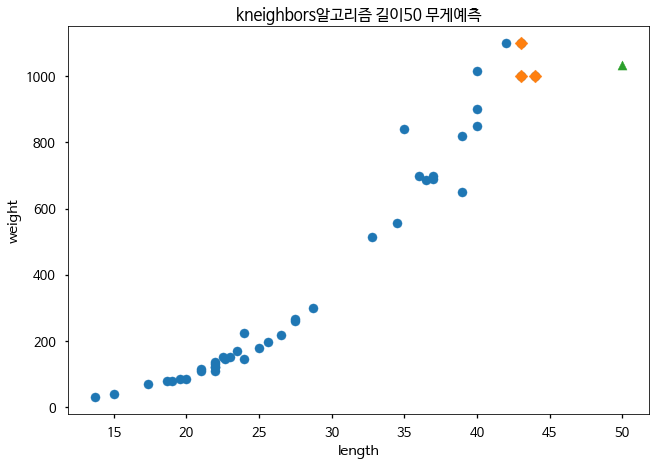


최근접 3개의 무게 평균: 1033.3333333333333
길이100예측: [1033.33333333]



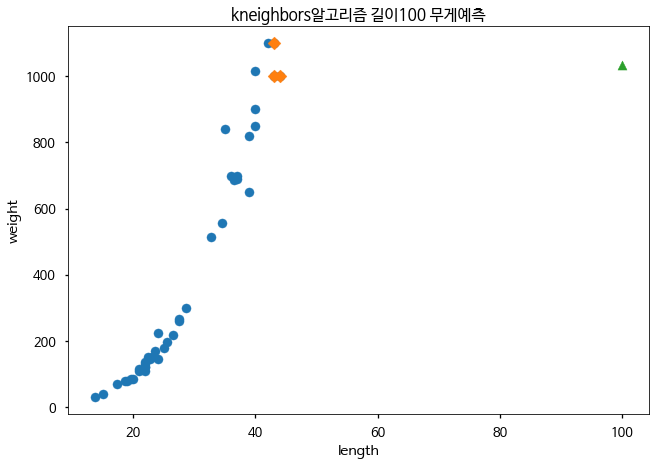

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42 )
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# k-최근접이웃회귀 알고리즘의 문제 : 훈련데이터보다 훨씬 큰 데이터를 예측하지 못한다.
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
print('길이50예측:',knr.predict([[50]]) )   # 실제에 비해 지나치게 작게 예측
print()

# 문제를 시각화
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker='D')
plt.scatter(50,knr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('kneighbors알고리즘 길이50 무게예측')
plt.show()
print()
# k-최근접이웃회귀의 문제점 : 가장 가까운 데이터의 평균으로 예측하다보니 예측이 훈련데이터로 제한됨
print('최근접 3개의 무게 평균:',np.mean(train_target[indexes]))
pre_100 = knr.predict([[100]])
print('길이100예측:',pre_100) # 길이 50이나 100이나 같은 무게를 예측
print()

distances_100, indexes_100 = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100,pre_100, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('kneighbors알고리즘 길이100 무게예측')
plt.show()

#### 농어의 데이터에 맞게 >>그래프를 그려서<< 농어의 무게를 예측하는 알고리즘: 선형회귀 알고리즘
- 데이터에 가장 잘맞는 모델파라미터를 학습한다(coef_, intercept_)


선형회귀로 50예측: [1241.83860323]

학습된 ax+b에서 a(기울기): [39.01714496] 
b(절편): -709.0186449535477



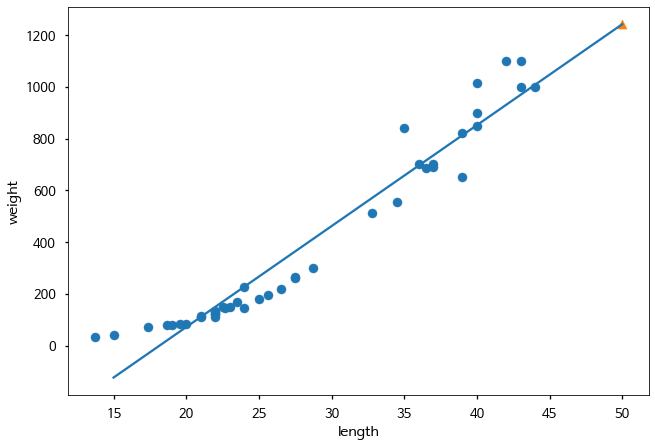


trainset_score: 0.939846333997604
testset_score: 0.8247503123313558


In [4]:
# 선형회귀알고리즘(LinearRegression)을 통해서 모델을 만들어보기
lr = LinearRegression()
lr.fit(train_input, train_target)
lr_pre_50 = lr.predict([[50]])
print('선형회귀로 50예측:',lr_pre_50)
print()
print('학습된 ax+b에서 a(기울기):',lr.coef_,'\nb(절편):',lr.intercept_)
# 내 예상에 기울기가 리스트형태로 나오는 이유는 선형회귀알고리즘에서 독립변수가 여러 개가 될 수 있기 때문이 아닐까..


# 그래프그리기
plt.scatter(train_input, train_target)
# 1차방정식그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,lr_pre_50,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
print()
plt.show()
print()

# score점수 확인
print('trainset_score:',lr.score(train_input, train_target))
print('testset_score:',lr.score(test_input, test_target))
# 과대적합이 존재한다(책에서는 score가 낮아서 과소적합도 존재한다고 봄)

#### 다항회귀
- 모델의 독립변수가 여러개일때 (다차원 그래프를 선형회귀알고리즘을 통해 구현가능)
- 선형회귀알고리즘에서는 농어의 무게가 음수값으로 나올 수 있다는 문제점이 있다 (보완이 필요)
- 다항회귀에서 inputdata를 만드는 방법: 넘파이 열을 추가한다 (ex. 2차원일때 1열: x^2, 2열: x) 

훈련input행렬구성: (42, 2) 
testinput: (14, 2)

다항회귀로 50을 예측: [1573.98423528]
2차원모델파라미터 [  1.01433211 -21.55792498] 116.0502107827827



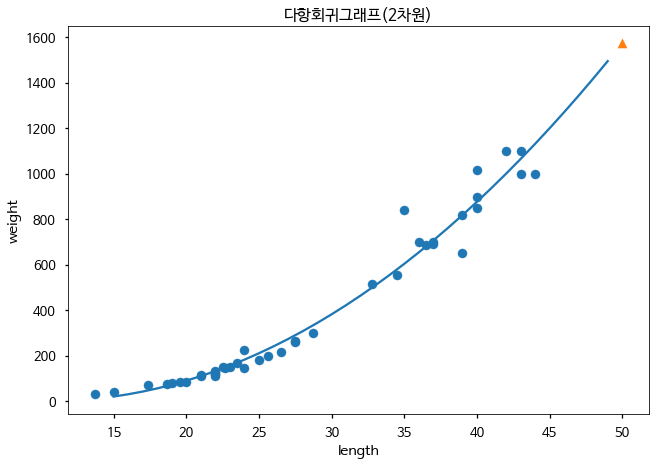


trainset_score: 0.9706807451768623
testset_score: 0.9775935108325122


In [5]:
# 1차에서 음수데이터를 없애고 싶다

# column_stack알고리즘으로 inputdata를 구현
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print('훈련input행렬구성:',train_poly.shape, '\ntestinput:',test_poly.shape)
print()

lr2 = LinearRegression()
lr2.fit(train_poly,train_target)
lr2_pre_50 = lr2.predict([[50**2,50]])
print('다항회귀로 50을 예측:',lr2_pre_50)
print('2차원모델파라미터',lr2.coef_,lr2.intercept_)
# 무게 = 1.01*길이^2 - 21.6*길이 + 116.05
print()

# 시각화
point = (np.arange(15,50))
point_p = np.column_stack((point**2,point)) # point_p가 이미 2차원의 형태
plt.scatter(train_input, train_target)
plt.plot(point, lr2.predict(point_p))  
# 직선그래프를 여러개 그려서 2차원의 형태를 만들어 놓은 거라서 좀 맘에 안든다
plt.scatter(50,lr2_pre_50,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('다항회귀그래프(2차원)')
plt.show()
print()
# 이젠 잘 예측한다 음수 때문에 2차원을 생각했는데 성능도 올라가는 효과

print('trainset_score:',lr2.score(train_poly,train_target))
print('testset_score:',lr2.score(test_poly,test_target))
# 과소적합약간 근데 성능은 완전 올라감

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

# point_p, train_target

In [8]:
# 맘에 안드는 그래프를 다시 그려보자 => 포기

%matplotlib inline
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import style
import matplotlib

style.use('seaborn-talk')
krfont = {'family':'NanumGothic','weight':'bold','size':10}
mpl.rc('font',**krfont)
mpl.rcParams['axes.unicode_minus'] = False

pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform([point])
pr.fit(x_quad,train_target)
y_quad_fit = pr.predict(quadratic.fit_transform(point))
plt.scatter(train_input, train_target)
plt.plot(point, y_quad_fit)  
# 직선그래프를 여러개 그려서 2차원의 형태를 만들어 놓은 거라서 좀 맘에 안든다
plt.scatter(50,lr2_pre_50,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('다항회귀그래프(2차원)')
plt.show()
print()

ValueError: ignored